In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### Importing data set and putting into a matrix

In [125]:
# Import data. Data is in ml-latest-small/ratings.csv. 
# It has columns: userId, movieId, rating, and timestamp.

ratings = np.genfromtxt('ml-latest-small/ratings.csv', delimiter=',')
ratings = np.delete(ratings, (0), axis=0) # Remove column title row
ratings = np.delete(ratings, (3), axis=1) # Remove time stamp column

num_users = np.size(np.unique(ratings[:,0]))
num_movies = np.size(np.unique(ratings[:,1]))
num_ratings = np.shape(ratings)[0]

In [126]:
# Create a dictionary where the key is the movie id and the value is the location in data

movie_ids = {}
counter = 0
for rating in ratings:
    if rating[1] not in movie_ids.keys():
        movie_ids[rating[1]] = counter
        counter += 1

In [127]:
# Put ratings into a matrix of size num_users x num_movies. 
# To get the rating of a user for a specific movie, do data[userId - 1, movie_ids[movieId]]

data = np.zeros([num_users, num_movies])

for rating in ratings:
    user = int(rating[0]) - 1
    movie = int(movie_ids[rating[1]])
    data[user, movie] = rating[2]

#### Trimming the data set

In [128]:
# Popular movie trimming

nz_movie = np.count_nonzero(data, axis=0)
unpop_movies = []
for i in range(len(nz_movie)):
    if nz_movie[i] <= 2:
        unpop_movies.append(i)

data_popular = np.delete(data, unpop_movies, axis=1)
# print(np.unique(np.count_nonzero(data_popular, axis=0)))

In [129]:
# Unpopular movie trimming

nz_movie = np.count_nonzero(data, axis=0)
pop_movies = []
for i in range(len(nz_movie)):
    if nz_movie[i] > 2:
        pop_movies.append(i)
        
data_unpopular = np.delete(data, pop_movies, axis=1)
# print(np.unique(np.count_nonzero(data_unpopular, axis=0)))

In [130]:
# High variance movie trimming

nz_movie = np.count_nonzero(data, axis=0)
movies_less5 = []
for i in range(len(nz_movie)):
    if nz_movie[i] < 5:
        movies_less5.append(i)

data_more5 = np.delete(data, movies_less5, axis=1)

variances = np.zeros(np.shape(data_more5)[1])
for i in range(np.shape(data_more5)[1]):
    variances[i] = np.var(data_more5[:, i])

lowvar_movies = []
for i in range(np.shape(data_more5)[1]):
    if variances[i] < 2:
        lowvar_movies.append(i)
data_highvar = np.delete(data_more5, lowvar_movies, axis=1)

# print(data_highvar.shape)
# print(np.var(data_highvar[:,13]))

#### Question 1

In [131]:
num_available_ratings = np.count_nonzero(data)
num_possible_ratings = np.size(data)

sparsity = num_available_ratings / num_possible_ratings
print('Sparsity =', sparsity)

Sparsity = 0.016999683055613623


#### Question 2

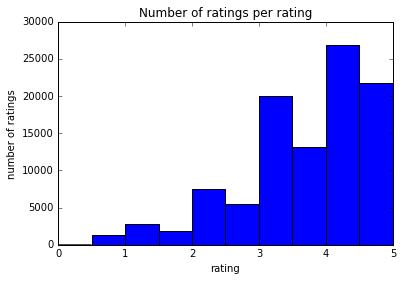

In [132]:
# Put all nonzero ratings into an array, nonzero_ratings, and make a histogram.

nz = np.nonzero(data)

nonzero_ratings = np.zeros(len(nz[0]))
for i in range(len(nz[0])):
    nonzero_ratings[i] = data[nz[0][i], nz[1][i]]

plt.figure()
plt.hist(nonzero_ratings, np.arange(11)/2)
plt.title('Number of ratings per rating')
plt.xlabel('rating')
plt.ylabel('number of ratings')
plt.show()

#### Question 3

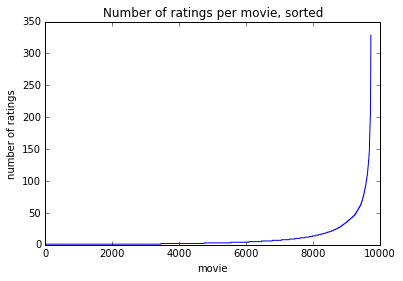

In [133]:
# Plot the number of nonzero ratings for each movie.
# NOTE: the x axis does NOT correspond to the movieId or movie index in data.

nz_movie = np.count_nonzero(data, axis=0)
sorted_nz_movie = np.sort(nz_movie)

plt.figure()
plt.plot(sorted_nz_movie)
plt.title('Number of ratings per movie, sorted')
plt.xlabel('movie')
plt.ylabel('number of ratings')
plt.show()

#### Question 4

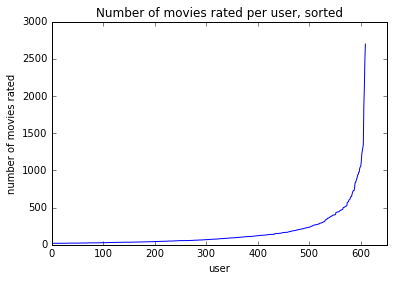

In [134]:
# Plot the number of ratings each user gave.
# NOTE: the x axis does NOT correspond to the userID.

nz_user = np.count_nonzero(data, axis=1)
sorted_nz_user = np.sort(nz_user)

plt.figure()
plt.plot(sorted_nz_user)
plt.title('Number of movies rated per user, sorted')
plt.xlabel('user')
plt.ylabel('number of movies rated')
plt.xlim(right=650)
plt.show()

#### Question 6

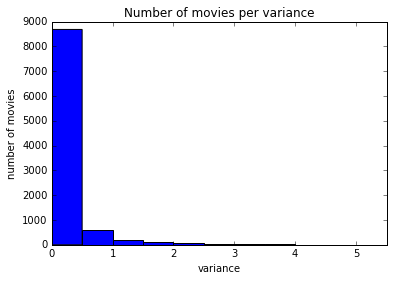

In [135]:
# Histogram for number of movies whose variance in scores falls in some range.

variances = np.zeros(num_movies)
for i in range(num_movies):
    variances[i] = np.var(data[:, i])
    
# print(np.max(variances))    

plt.figure()
plt.hist(variances, np.arange(12)/2)
plt.xlim(right=5.5)
plt.title('Number of movies per variance')
plt.xlabel('variance')
plt.ylabel('number of movies')
plt.show()